In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import numpy.ma as ma
from matplotlib import pyplot as plt
import quandl
from datetime import datetime
import statsmodels.api as sm
from sklearn import linear_model
from scipy import stats as st

In [2]:
#Reading in the freights dataset
data_freight=pd.read_excel("Freight_data.xls", sheet_name="Data",skiprows=3)
data_freight

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,2485.776263,2642.201982,2722.613272,2739.366939,2870.646839,3607.123878,3526.787055,3732.431229,3297.129486,NaN
2,Afghanistan,AFG,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,116.660723,84.621216,34.283472,33.102039,29.010881,21.462557,29.559349,20.014206,19.878902,NaN
3,Africa Western and Central,AFW,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,73.395160,65.833192,70.818192,42.886310,39.603981,41.329198,39.663229,32.295049,21.731377,NaN
4,Angola,AGO,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,70.977000,70.431000,65.517000,46.043000,43.940435,67.320350,78.159640,68.043580,28.899770,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,3.270000,0.000000,2.475464,NaN
263,South Africa,ZAF,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,1174.666806,1122.986468,1042.736264,892.734324,767.271186,833.347948,696.730006,565.209470,102.392463,NaN
264,Zambia,ZMB,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,93.432545,83.431252,79.382096,80.352947,81.557610,75.077398,79.335000,69.971218,NaN


In [3]:
#Reading in the export dataset
data_export=pd.read_excel("Export_data.xls", sheet_name="Data",skiprows=3)
data_export

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.911732e+09,2.088268e+09,2.184358e+09,2.158659e+09,2.143017e+09,2.243575e+09,2.363128e+09,2.468715e+09,1.411732e+09,NaN
1,Africa Eastern and Southern,AFE,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.888912e+11,2.846749e+11,2.761874e+11,2.115561e+11,1.929468e+11,2.175653e+11,2.487967e+11,2.356622e+11,2.056954e+11,2.743087e+11
2,Afghanistan,AFG,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2.222223e+07,2.444446e+07,2.666668e+07,6.888892e+07,7.111114e+07,1.133333e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Exports of goods and services (current US$),NE.EXP.GNFS.CD,1.744130e+09,1.916222e+09,1.952275e+09,2.085958e+09,2.426832e+09,2.666884e+09,...,2.476241e+11,1.942561e+11,2.027657e+11,1.328186e+11,1.165599e+11,1.423348e+11,1.669693e+11,1.716240e+11,NaN,NaN
4,Angola,AGO,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.992413e+10,6.769742e+10,6.134143e+10,2.595175e+10,1.401738e+10,2.000493e+10,3.176775e+10,2.827171e+10,2.032767e+10,2.747525e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.511481e+09,1.549478e+09,1.664447e+09,1.413499e+09,1.592346e+09,1.962433e+09,2.288980e+09,2.315661e+09,1.674198e+09,3.191153e+09
262,"Yemen, Rep.",YEM,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.802089e+09,9.036684e+09,9.287267e+09,3.841896e+09,1.046815e+09,1.006492e+09,1.308592e+09,1.561768e+09,1.179873e+09,NaN
263,South Africa,ZAF,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2.238599e+09,2.337999e+09,2.498999e+09,2.696399e+09,2.846199e+09,2.913399e+09,...,1.178926e+11,1.137686e+11,1.105500e+11,9.608590e+10,9.110902e+10,1.042884e+11,1.112854e+11,1.060698e+11,9.317915e+10,1.306358e+11
264,Zambia,ZMB,Exports of goods and services (current US$),NE.EXP.GNFS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022237e+10,1.135024e+10,1.053677e+10,7.892389e+09,7.403491e+09,9.053912e+09,9.987197e+09,8.073235e+09,8.473994e+09,1.157625e+10


These datasets are for many countries but my case study for now is china, as a great country in production and trade world wide. We will be studying the case for china for the years 1974 to 2020.

In [5]:
#defining the independent variable(exports) for china from 1974 to 2020
china_exports=data_export.loc[40, '1974':'2020']
xchina=pd.to_numeric(china_exports)
xchina

1974    7.107893e+09
1975    7.688999e+09
1976    6.943443e+09
1977    7.519647e+09
1978    6.813008e+09
1979    9.204348e+09
1980    1.130000e+10
1981    1.458730e+10
1982    1.632471e+10
1983    1.662033e+10
1984    2.051900e+10
1985    2.577244e+10
1986    2.622385e+10
1987    2.843555e+10
1988    3.440545e+10
1989    3.139422e+10
1990    4.493259e+10
1991    5.151146e+10
1992    5.787075e+10
1993    5.335834e+10
1994    1.046074e+11
1995    1.318699e+11
1996    1.548119e+11
1997    1.874470e+11
1998    1.887481e+11
1999    1.986970e+11
2000    2.530951e+11
2001    2.720600e+11
2002    3.330023e+11
2003    4.479583e+11
2004    6.073569e+11
2005    7.733390e+11
2006    9.917314e+11
2007    1.258057e+12
2008    1.497869e+12
2009    1.262664e+12
2010    1.654816e+12
2011    2.006297e+12
2012    2.175081e+12
2013    2.354249e+12
2014    2.462839e+12
2015    2.362093e+12
2016    2.199968e+12
2017    2.424200e+12
2018    2.655592e+12
2019    2.628935e+12
2020    2.723250e+12
Name: 40, dty

In [6]:
#defining the dependent variable(freights)for China for period 1974-2020
china_freight=data_freight.loc[40, '1974':'2020' ]
ychina=pd.to_numeric(china_freight)
ychina

1974       29.200001
1975       46.200001
1976       49.000000
1977       60.000000
1978       86.000000
1979      123.000000
1980      120.900002
1981      155.399994
1982      184.199997
1983      216.000000
1984      302.000000
1985      403.000000
1986      467.500000
1987      647.500000
1988      731.799988
1989      683.099976
1990      818.299988
1991     1009.500000
1992     1316.000000
1993     1547.000000
1994     1717.199951
1995     1501.000000
1996     1688.599976
1997     2083.600098
1998     2474.199951
1999     3295.399902
2000     3900.080000
2001     4232.312000
2002     5013.505000
2003     5650.630000
2004     7024.250000
2005     7579.401000
2006     7692.205000
2007    11189.538000
2008    11386.055000
2009    11976.438000
2010    17193.877400
2011    16764.869000
2012    15568.753000
2013    16053.733100
2014    17822.581000
2015    19805.630000
2016    21304.585100
2017    23323.614700
2018    25256.207100
2019    25394.587800
2020    19264.243600
Name: 40, dty

In [7]:
#Calculating the correlation between the two variables
cof=np.corrcoef(xchina,ychina)
cof

array([[1.        , 0.98172257],
       [0.98172257, 1.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

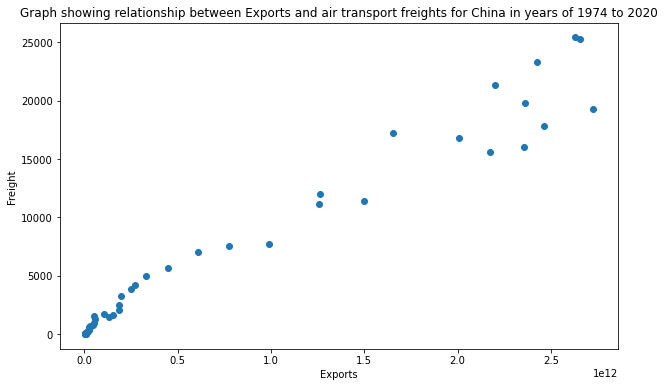

In [9]:
#Visualizing the exports against freights for China
plt.figure(figsize=(10,6))
plt.scatter(xchina,ychina)
plt.xlabel("Exports")
plt.ylabel("Freight")
# plt.legend()
plt.title("Graph showing relationship between Exports and air transport freights for China in years of 1974 to 2020")
plt.show

From the correlation coefficient calculated and the scatter plot above, we can see that the two variables are positively correlated; which means the exports affects the freights in a way that an increase in exports leads to an increase in freights.<br>Let's now build a linear regression function to use in predicting future freights having exports.

In [10]:
regressor = stats.linregress(xchina, ychina)
regressor

LinregressResult(slope=8.220442575392797e-09, intercept=620.6456893684008, rvalue=0.9817225713002089, pvalue=4.540878062055425e-34, stderr=2.375631875903307e-10, intercept_stderr=287.3799256461546)

In [11]:
#Manually predicting the freights using slope and intercept for the year 2021 
export21=data_export.loc[40, '2021']
freight21 = regressor.intercept + regressor.slope*export21
print("The predicted freight for 2021 using our model = ",freight21)

The predicted freight for 2021 using our model =  29791.321539308447


In [19]:
#Now let us use our regressor and predict the freight for all the years we have, then compare the regressor's predictions and the real values
predy = regressor.intercept + regressor.slope*xchina
# predy

<function matplotlib.pyplot.show(close=None, block=None)>

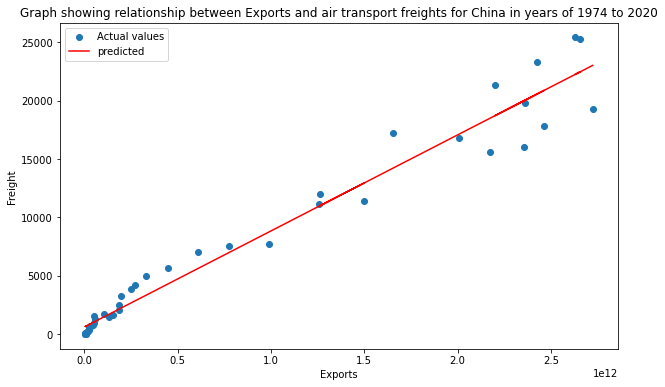

In [20]:
#Ploting the predicted values together with actual values
plt.figure(figsize=(10,6))
plt.scatter(xchina,ychina, label="Actual values")
plt.plot(xchina, regressor.intercept + regressor.slope*xchina, 'r', label='predicted')
plt.xlabel("Exports")
plt.ylabel("Freight")
plt.legend()
plt.title("Graph showing relationship between Exports and air transport freights for China in years of 1974 to 2020")
plt.show

Briefly, this was a simple assess for a trend in the domain of transport (relationship betweenexports and freights) for one country (China). The reason to asses for China is because it is a very commercial and exporting country.The assumptions were that a country with many exports have more freights as well, and they are proven to be true.<br>This was the case for China, if interested, one can also assess for other countries as well. 
